# Table of Contents

1. [Objective](#objective)
2. [Hypothesis](#hypothesis)
4. [Project Structure](#project_structure)
    1. [Sourcing and Loading](#1_sourcing_and_loading)
    2. [Exploratory Data Analysis (EDA)](#2_exploratory_data_analysis_eda)
        - [Visualize Time Series Data](#2.1_visualize_time_series_data)
        - [Explore Daily Returns](#2.2_explore_daily_returns)
    3. [Further Analysis](#3_further_analysis)
        - [Statistical Analysis](#3.1_statistical_analysis)
        - [Correlation Analysis](#3.2_correlation_analysis)
        - [Visualization of Correlations](#3.3_visualization_of_correlations)

#### 1.1 Importing Libraries<a id='1.1_importing_libraries'></a>

In [2]:
# Import the pandas, numpy libraries as pd, and np respectively. 
import pandas as pd
import numpy as np

# Load the pyplot collection of functions from matplotlib, as plt 
import matplotlib.pyplot as plt 

#### 1.2.  Loading the data<a id='1.2_loading_the_data'></a>

The data comes from the [Kaggle](https://www.kaggle.com/datasets/abhimaneukj/tesla-inc-tsla-dataset?resource=download): a free, open-source data-sharing portal with a massive range of datasets.

In [3]:
df = pd.read_csv('../data/TSLA_cleaned.csv')

In [4]:
df.head()

,Date,Open,Open_Delta,High,High_Delta,Low,Low_Delta,Close,Close_Delta,Adj Close,Adj Close_Delta,Volume,Volume_Delta,daily_return Adj Close
0,2010-07-01,5.000,NaN,5.184,NaN,4.054,NaN,4.392,NaN,4.392,NaN,41094000,NaN,NaN
1,2010-07-02,4.600,-0.400,4.620,-0.564,3.742,-0.312,3.840,-0.552,3.840,-0.552,25699000,-15395000.0,-0.125683
2,2010-07-06,4.000,-0.600,4.000,-0.620,3.166,-0.576,3.222,-0.618,3.222,-0.618,34334500,8635500.0,-0.160937
3,2010-07-07,3.280,-0.720,3.326,-0.674,2.996,-0.170,3.160,-0.062,3.160,-0.062,34608500,274000.0,-0.019243
4,2010-07-08,3.228,-0.052,3.504,0.178,3.114,0.118,3.492,0.332,3.492,0.332,38557000,3948500.0,0.105063


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

# Create Time-Based Indices:
df.set_index('Date', inplace=True)

df.head()

,Open,Open_Delta,High,High_Delta,Low,Low_Delta,Close,Close_Delta,Adj Close,Adj Close_Delta,Volume,Volume_Delta,daily_return Adj Close
Date,,,,,,,,,,,,,
2010-07-01,5.000,NaN,5.184,NaN,4.054,NaN,4.392,NaN,4.392,NaN,41094000,NaN,NaN
2010-07-02,4.600,-0.400,4.620,-0.564,3.742,-0.312,3.840,-0.552,3.840,-0.552,25699000,-15395000.0,-0.125683
2010-07-06,4.000,-0.600,4.000,-0.620,3.166,-0.576,3.222,-0.618,3.222,-0.618,34334500,8635500.0,-0.160937
2010-07-07,3.280,-0.720,3.326,-0.674,2.996,-0.170,3.160,-0.062,3.160,-0.062,34608500,274000.0,-0.019243
2010-07-08,3.228,-0.052,3.504,0.178,3.114,0.118,3.492,0.332,3.492,0.332,38557000,3948500.0,0.105063


##### Historical Trading Volume and Price Analysis for Tesla Stock
**Plotting Yearly Mean Volume:** 
* This section is responsible for plotting the yearly mean volume of Tesla stock. It visualizes how the trading volume of Tesla stock has changed over the years on a yearly basis.
**Plotting Yearly Mean Adjusted Closing Price:**
* This section plots the yearly mean adjusted closing price of Tesla stock. It provides insight into the average price at which Tesla stock closed over each year.

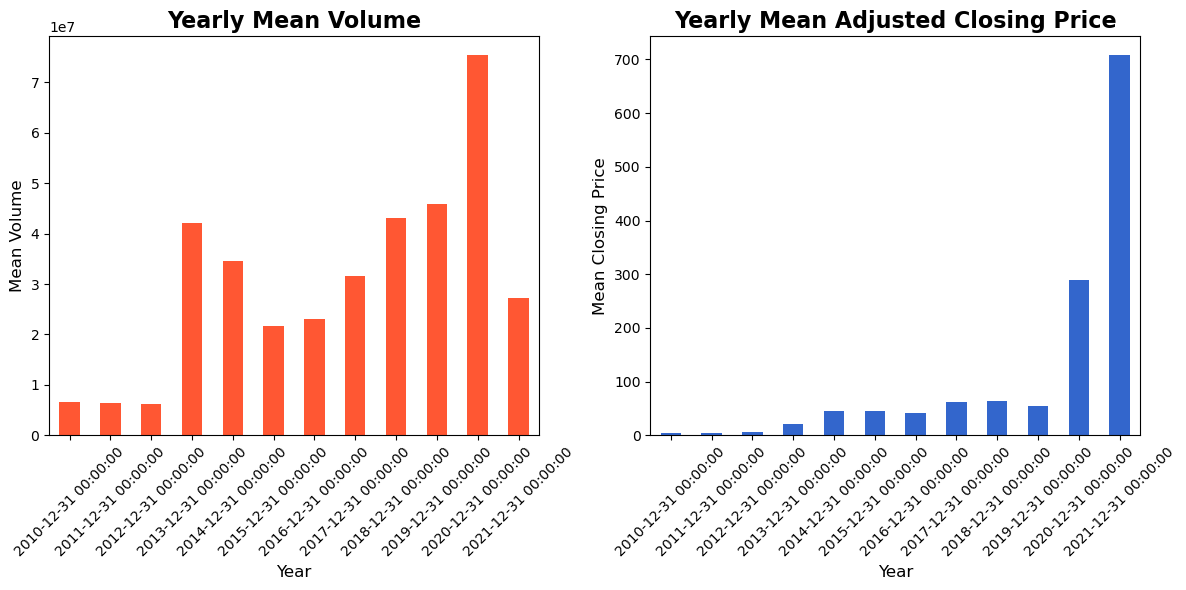

In [6]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Mean Volume
title_volume = 'Yearly Mean Volume'
df['Volume'].resample('A').mean().plot(kind='bar', color='#ff5733', ax=axs[0])  
axs[0].set_title(title_volume, fontsize=16, fontweight='bold')
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('Mean Volume', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)  

# Plot for Mean Adjusted Closing Price
title_adj_close = 'Yearly Mean Adjusted Closing Price'
df['Adj Close'].resample('A').mean().plot(kind='bar', color='#3366cc', ax=axs[1])  
axs[1].set_title(title_adj_close, fontsize=16, fontweight='bold')
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Mean Closing Price', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)  

plt.tight_layout()  
plt.show()


**Adjusted Closing Price Plot:**
* This subsection visualizes the historical trend of Tesla's adjusted closing prices over the specified period. It helps analysts and investors understand the overall movement and trends in Tesla's stock price, including identifying patterns such as uptrends, downtrends, or periods of consolidation. By observing the adjusted closing price plot, one can gain insights into the performance of Tesla stock and make informed decisions regarding buying, selling, or holding the stock.

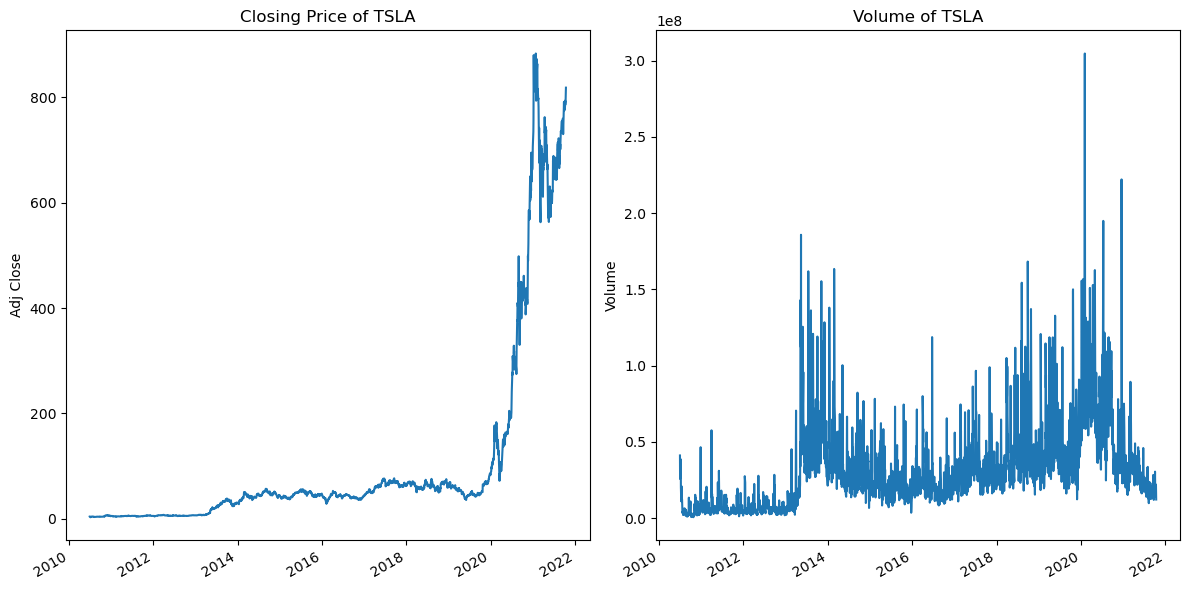

In [7]:
import matplotlib.pyplot as plt

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Adj Close in the first subplot
df['Adj Close'].plot(ax=axs[0])
axs[0].set_ylabel('Adj Close')
axs[0].set_xlabel(None)
axs[0].set_title("Closing Price of TSLA")

# Plot Volume in the second subplot
df['Volume'].plot(ax=axs[1])
axs[1].set_ylabel('Volume')
axs[1].set_xlabel(None)
axs[1].set_title("Volume of TSLA")

# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()


##### Moving Average Analysis for Tesla Stock

**Smoothing Price Data:**
* Moving averages help smooth out short-term fluctuations in stock prices, providing a clearer picture of the underlying trend. By averaging out price movements over a specified time period, moving averages reveal the overall direction of the stock's price movement.

**Identifying Trends:**
* Moving averages are widely used to identify trends in stock prices. A rising moving average suggests an uptrend, while a declining moving average indicates a downtrend. By comparing different moving averages over various time periods, analysts can assess the strength and consistency of a trend.

**Support and Resistance Levels:**
* Moving averages can act as dynamic support and resistance levels for stock prices. When the stock price crosses above a moving average, it may signal a bullish breakout, while a move below a moving average could indicate a bearish reversal. Traders often use moving averages to identify potential entry and exit points for their positions.

**Signal Crossovers:**
* The intersection of different moving averages, such as the 7-day and 28-day moving averages, can generate trading signals. For example, a "golden cross" occurs when a shorter-term moving average crosses above a longer-term moving average, signaling a potential bullish trend reversal. Conversely, a "death cross" occurs when a shorter-term moving average crosses below a longer-term moving average, indicating a possible bearish trend reversal.

**Seasonal and Monthly Trends:** 
* By calculating moving averages based on shorter time frames such as seasons or months, analysts can identify seasonal or monthly patterns in stock prices. This information can be valuable for understanding the cyclical nature of Tesla's stock performance and making seasonal investment strategies.

    Overall, moving averages play a crucial role in technical analysis and stock trading by providing insights into price trends, support and resistance levels, and potential trading signals. In the context of Tesla stock analysis, utilizing moving averages can help investors make more informed decisions about buying, selling, or holding Tesla shares based on the prevailing price trends and market dynamics.





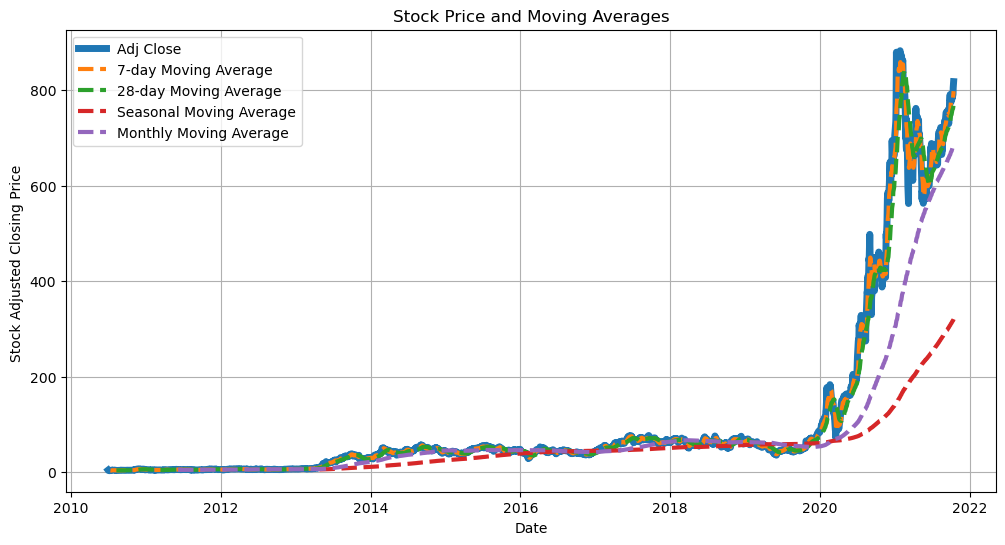

In [8]:
def calculate_moving_average(df, window_size):
    return df['Adj Close'].rolling(window=window_size).mean()

# Calculate moving averages for different time periods
df['MA_7_days'] = calculate_moving_average(df, window_size=7)
df['MA_28_days'] = calculate_moving_average(df, window_size=28)
df['MA_season'] = df['Adj Close'].rolling(window=len(df) // 4).mean()  # Assuming 4 seasons in a year
df['MA_month'] = df['Adj Close'].rolling(window=len(df) // 12).mean()  # Assuming 12 months in a year

# Visualization
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Adj Close'], label='Adj Close', linewidth=5)
plt.plot(df.index, df['MA_7_days'], label='7-day Moving Average', linestyle='--', linewidth = 3 )
plt.plot(df.index, df['MA_28_days'], label='28-day Moving Average', linestyle='--', linewidth = 3)
plt.plot(df.index, df['MA_season'], label='Seasonal Moving Average', linestyle='--', linewidth = 3)
plt.plot(df.index, df['MA_month'], label='Monthly Moving Average', linestyle='--', linewidth = 3)

plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Adjusted Closing Price ')
plt.legend()
plt.grid(True)
plt.show()

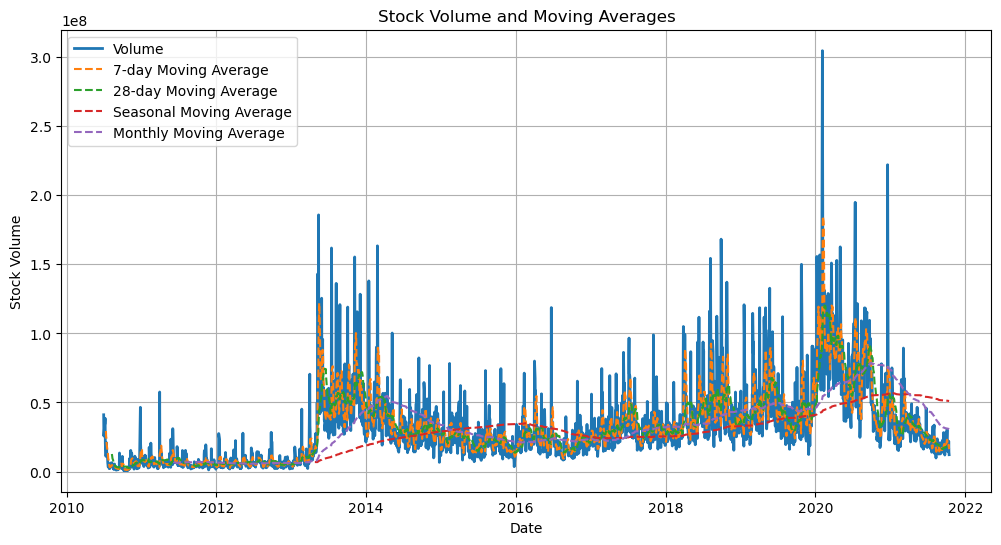

In [9]:
def calculate_moving_average(df, window_size, column='Volume'):
    return df[column].rolling(window=window_size).mean()


# Calculate moving averages for different time periods
df['MA_7_days'] = calculate_moving_average(df, window_size=7, column='Volume')
df['MA_28_days'] = calculate_moving_average(df, window_size=28, column='Volume')
df['MA_season'] = df['Volume'].rolling(window=len(df) // 4).mean()  # Assuming 4 seasons in a year
df['MA_month'] = df['Volume'].rolling(window=len(df) // 12).mean()  # Assuming 12 months in a year

# Visualization
plt.figure(figsize=(12, 6))

plt.plot(df.index, df['Volume'], label='Volume', linewidth=2)
plt.plot(df.index, df['MA_7_days'], label='7-day Moving Average', linestyle='--')
plt.plot(df.index, df['MA_28_days'], label='28-day Moving Average', linestyle='--')
plt.plot(df.index, df['MA_season'], label='Seasonal Moving Average', linestyle='--')
plt.plot(df.index, df['MA_month'], label='Monthly Moving Average', linestyle='--')

plt.title('Stock Volume and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Volume')
plt.legend()
plt.grid(True)
plt.show()


**Plotting Daily Returns:**
This subsection visualizes the daily returns of Tesla stock, showing how the percentage change in the adjusted closing price varies from day to day.
* **Importance:** Daily returns provide crucial information about the volatility and short-term performance of the stock. Analyzing daily returns helps investors assess risk, track performance, and identify patterns or anomalies in the stock's behavior.

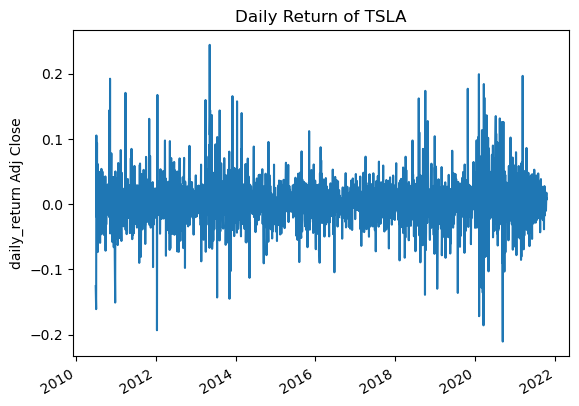

In [11]:
df['daily_return Adj Close'].plot()
plt.ylabel('daily_return Adj Close')
plt.xlabel(None)
plt.title("Daily Return of TSLA")

plt.show()

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate Freedman-Diaconis' bin width
data = df['daily_return Adj Close'].dropna()
n = len(data)
iqr = np.percentile(data, 75) - np.percentile(data, 25)
bin_width = 2 * iqr / (n ** (1/3))
bins = int((data.max() - data.min()) / bin_width)

print('Best bin width using Freedman-Diaconis Method:', bins)

Best bin width using Freedman-Diaconis Method: 95


**Plotting Daily Return Histogram:**
This subsection creates a histogram of the daily returns with the calculated optimal bin width.
* **Importance:** The histogram provides a visual representation of the distribution of daily returns, allowing analysts to observe the frequency and spread of returns. By examining the shape of the histogram, analysts can gain insights into the risk profile and potential return distribution of Tesla stock, which is crucial for portfolio management and risk assessment.

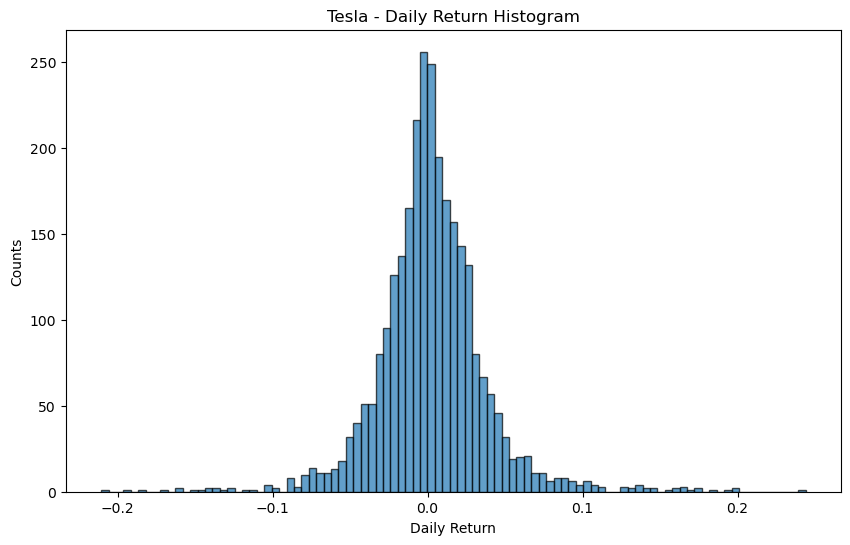

In [18]:
# Plot histogram with optimal bin width
plt.figure(figsize=(10, 6))
plt.hist(data, bins= bins, edgecolor='black', alpha=0.7)

plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.title("Tesla - Daily Return Histogram")
plt.show()

## Delta Values: 

### Calculation of Delta Values:

#### This subsection calculates the difference (delta) between the adjusted closing price of Tesla stock at different intervals.

**Importance:** 
Computing delta values allows analysts to quantify the changes in the stock price over various time intervals. By examining these differences, analysts can identify trends, volatility patterns, and potential turning points in the stock's price movement.

### Visualization of Delta Values:

#### This subsection visualizes the delta values for different intervals using matplotlib.

**Importance:** 
Visualization of delta values helps analysts gain a visual understanding of how the magnitude of price changes varies over time. By plotting delta values for different intervals on the same graph, analysts can compare the impact of short-term versus long-term price movements and assess the overall volatility and stability of the stock.

Each subsection serves a specific purpose in stock analysis:

- **Calculation of Delta Values:** Provides quantitative measures of price changes, facilitating trend analysis and volatility assessment.
- **Visualization of Delta Values:** Offers a graphical representation of price changes, enabling analysts to identify patterns, anomalies, and correlations in the stock's price movement.


In [14]:
# Assuming your DataFrame is named 'df'
selected_columns = ['Adj Close', 'Adj Close_Delta']
df_subset = df[selected_columns]

df_subset.head()
 
    


,Adj Close,Adj Close_Delta
Date,,
2010-07-01,4.392,NaN
2010-07-02,3.840,-0.552
2010-07-06,3.222,-0.618
2010-07-07,3.160,-0.062
2010-07-08,3.492,0.332


In [15]:
# Specify intervals to check
intervals_to_check = [2, 5, 10, 100, 500, 1000, 2000, 2843]

# Create a new DataFrame to store the calculated deltas
df_deltas = pd.DataFrame(index=df.index)

# Fill initial NaN values with zeros
df['Adj Close_Delta'] = df['Adj Close'].diff()
df['Adj Close_Delta'].fillna(0, inplace=True)

# Calculate delta for specified intervals and add columns to the new DataFrame
for interval in intervals_to_check:
    new_column_name = f'Adj Close_Delta_{interval}'
    df_deltas[new_column_name] = df['Adj Close'].diff(periods=interval)

    
df_delta = pd.concat([df_subset, df_deltas])

In [16]:
# Specify intervals to check
intervals_to_check = [10, 100, 500, 1000, 2000, len(df)]

# Create a new DataFrame to store the calculated deltas
df_deltas = pd.DataFrame(index=df.index)

# Calculate delta for specified intervals and add columns to the new DataFrame
for interval in intervals_to_check:
    new_column_name = f'Adj Close_Delta_{interval}'
    df_deltas[new_column_name] = df['Adj Close'].diff(periods=interval)

df_deltas.head()


,Adj Close_Delta_10,Adj Close_Delta_100,Adj Close_Delta_500,Adj Close_Delta_1000,Adj Close_Delta_2000,Adj Close_Delta_2843
Date,,,,,,
2010-07-01,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-07,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-08,NaN,NaN,NaN,NaN,NaN,NaN


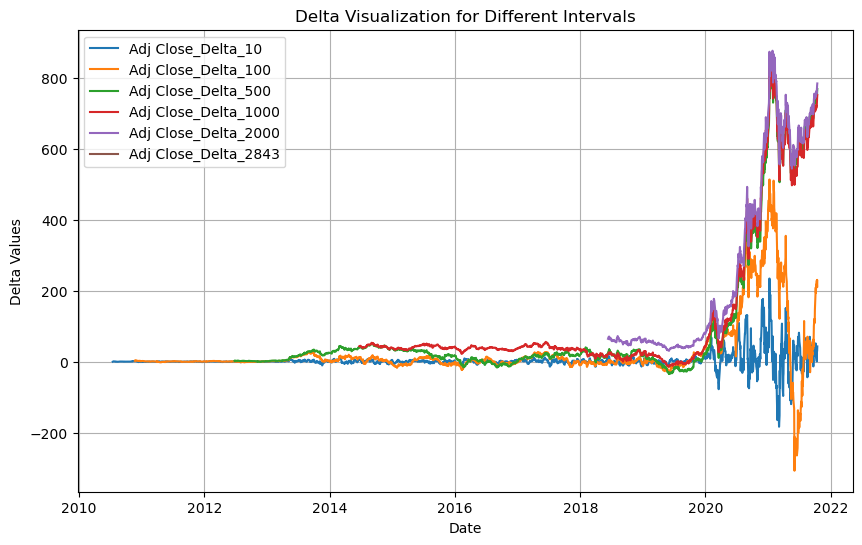

In [17]:
# Visualization using matplotlib
plt.figure(figsize=(10, 6))

for column in df_deltas.columns:
    plt.plot(df_deltas.index, df_deltas[column], label=column)

plt.title('Delta Visualization for Different Intervals')
plt.xlabel('Date')
plt.ylabel('Delta Values')
plt.legend()
plt.grid(True)
plt.show()